**Algoritmo de detección de fraude:**
---

¡¡Hola!! En este proyecto veremos como generar un algoritmo para detectar posibles riesgos de mora en clientes con deuda de un Banco Checo. Para ello avanzaremos paso por paso desde el inicio. Veremos como extraer la información, como transformarla, como aplicar correlación para poder ver como se relacionan entre si las distintas variables y con todo esto poder realizar gráficos que ayuden a visualizar dichas relaciones.

El dataset utlizado en este caso es de un banco de Republica Checa. Puede acceder al mismo desde el siguiente link:
https://github.com/Kusainov/czech-banking-fin-analysis


Las preguntas que queremos contestar son las siguientes:

1) ¿Cuál es el rango etario de los clientes?

2) ¿Los distritos mas ricos toman mas deuda o menos deuda?

3) ¿Qué méses se endeudan más los clientes?

4) ¿Que porcentaje de clientes hay de acuerdo al género?¿Y qué genero es mas probable que termine en mora por no pagar su deuda?


In [1]:
#Importamos las liberías necesarias para el proyecto

import numpy as np # 
import pandas as pd # 


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from datetime import datetime
from datetime import date

import os

print(os.listdir("C:/Users/Francisco/Documents/Dataset_ZcechBank"))

['account.csv', 'card.csv', 'client.csv', 'disp.csv', 'district.csv', 'loan.csv', 'order.csv', 'trans.csv']


In [2]:
#cargando los datasets

url = "C:/Users/Francisco/Documents/Dataset_ZcechBank/"

accounts_df = pd.read_csv (f'{url}account.csv', sep = ';')
cards_df = pd.read_csv (f'{url}card.csv', sep = ';')
clients_df = pd.read_csv (f'{url}client.csv', sep = ';')
dispos_df = pd.read_csv (f'{url}disp.csv', sep = ';')
district_df = pd.read_csv (f'{url}district.csv', sep = ';')
loan_df = pd.read_csv (f'{url}loan.csv', sep = ';')
order_df = pd.read_csv (f'{url}order.csv', sep = ';')
trans_df = pd.read_csv (f'{url}trans.csv', sep = ';', low_memory=False)

<image src="C:/Users/Francisco/Downloads/68747470733a2f2f766965772e6477636f6e74656e742e636f6d2f66696c655f766965772f6c706574726f63656c6c692f637a6563682d66696e616e6369616c2d646174617365742d7265616c2d616e6f6e796d697a65642d7472616e73616374696f6e732f646174.gif" alt="Data Structure">

In [3]:
#lista de todos los dataframes
files = [accounts_df, cards_df, clients_df, dispos_df, district_df, loan_df, order_df, trans_df]
files_name = ['accounts_df', 'cards_df', 'clients_df', 'dispos_df', 'district_df', 'loan_df', 'order_df', 'trans_df']

In [4]:
#verificando la calidad de datos y los valores nulos del dataset  
for id, item in enumerate (files): 
    print ('Dataframe name: ' + str (files_name [id]) + " with number of rows:" + str (item.shape [0]) + ' and columns:' + str (item.shape [1]) )
    display (item.describe ())
    print (item.isnull ().sum ())
    print ('\n')

Dataframe name: accounts_df with number of rows:4500 and columns:4


,account_id,district_id,date
count,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,951654.608667
std,2313.811984,25.177217,14842.188377
min,1.000000,1.000000,930101.000000
25%,1182.750000,13.000000,931227.000000
50%,2368.000000,38.000000,960102.000000
75%,3552.250000,60.000000,961101.000000
max,11382.000000,77.000000,971229.000000


account_id     0
district_id    0
frequency      0
date           0
dtype: int64


Dataframe name: cards_df with number of rows:892 and columns:4


,card_id,disp_id
count,892.000000,892.000000
mean,480.855381,3511.862108
std,306.933982,2984.373626
min,1.000000,9.000000
25%,229.750000,1387.000000
50%,456.500000,2938.500000
75%,684.250000,4459.500000
max,1247.000000,13660.000000


card_id    0
disp_id    0
type       0
issued     0
dtype: int64


Dataframe name: clients_df with number of rows:5369 and columns:3


,client_id,birth_number,district_id
count,5369.000000,5369.000000,5369.000000
mean,3359.011920,535114.970013,37.310114
std,2832.911984,172895.618429,25.043690
min,1.000000,110820.000000,1.000000
25%,1418.000000,406009.000000,14.000000
50%,2839.000000,540829.000000,38.000000
75%,4257.000000,681013.000000,60.000000
max,13998.000000,875927.000000,77.000000


client_id       0
birth_number    0
district_id     0
dtype: int64


Dataframe name: dispos_df with number of rows:5369 and columns:4


,disp_id,client_id,account_id
count,5369.000000,5369.000000,5369.000000
mean,3337.097970,3359.011920,2767.496927
std,2770.418826,2832.911984,2307.843630
min,1.000000,1.000000,1.000000
25%,1418.000000,1418.000000,1178.000000
50%,2839.000000,2839.000000,2349.000000
75%,4257.000000,4257.000000,3526.000000
max,13690.000000,13998.000000,11382.000000


disp_id       0
client_id     0
account_id    0
type          0
dtype: int64


Dataframe name: district_df with number of rows:77 and columns:16


,A1,A4,A5,A6,A7,A8,A9,A10,A11,A13,A14,A16
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,63.035065,9031.675325,3.787013,116.129870,5030.831169
std,22.371857,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,16.221727,790.202347,1.908480,16.608773,11270.796786
min,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000
25%,20.000000,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,51.900000,8512.000000,2.310000,105.000000,2122.000000
50%,39.000000,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,59.800000,8814.000000,3.600000,113.000000,3040.000000
75%,58.000000,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,73.500000,9317.000000,4.790000,126.000000,4595.000000
max,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64


Dataframe name: loan_df with number of rows:682 and columns:7


,loan_id,account_id,date,amount,duration,payments
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,6172.466276,5824.162757,963027.910557,151410.175953,36.492669,4190.664223
std,682.579279,3283.512681,14616.406049,113372.406310,17.075219,2215.830344
min,4959.000000,2.000000,930705.000000,4980.000000,12.000000,304.000000
25%,5577.500000,2967.000000,950704.500000,66732.000000,24.000000,2477.000000
50%,6176.500000,5738.500000,970206.500000,116928.000000,36.000000,3934.000000
75%,6752.500000,8686.000000,971212.500000,210654.000000,48.000000,5813.500000
max,7308.000000,11362.000000,981208.000000,590820.000000,60.000000,9910.000000


loan_id       0
account_id    0
date          0
amount        0
duration      0
payments      0
status        0
dtype: int64


Dataframe name: order_df with number of rows:6471 and columns:6


,order_id,account_id,account_to,amount
count,6471.000000,6471.000000,6.471000e+03,6471.000000
mean,33778.197497,2962.302890,4.939904e+07,3280.635698
std,3737.681949,2518.503228,2.888356e+07,2714.475335
min,29401.000000,1.000000,3.990000e+02,1.000000
25%,31187.500000,1223.000000,2.415918e+07,1241.500000
50%,32988.000000,2433.000000,4.975606e+07,2596.000000
75%,34785.500000,3645.500000,7.400045e+07,4613.500000
max,46338.000000,11362.000000,9.999420e+07,14882.000000


order_id      0
account_id    0
bank_to       0
account_to    0
amount        0
k_symbol      0
dtype: int64


Dataframe name: trans_df with number of rows:1056320 and columns:10


,trans_id,account_id,date,amount,balance,account
count,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06,2.953890e+05
mean,1.335311e+06,2.936867e+03,9.656748e+05,5.924146e+03,3.851833e+04,4.567092e+07
std,1.227487e+06,2.477345e+03,1.394535e+04,9.522735e+03,2.211787e+04,3.066340e+07
min,1.000000e+00,1.000000e+00,9.301010e+05,0.000000e+00,-4.112570e+04,0.000000e+00
25%,4.302628e+05,1.204000e+03,9.601160e+05,1.359000e+02,2.240250e+04,1.782858e+07
50%,8.585065e+05,2.434000e+03,9.704100e+05,2.100000e+03,3.314340e+04,4.575095e+07
75%,2.060979e+06,3.660000e+03,9.802280e+05,6.800000e+03,4.960362e+04,7.201341e+07
max,3.682987e+06,1.138200e+04,9.812310e+05,8.740000e+04,2.096370e+05,9.999420e+07


trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64




Como vemos hay algunas columnas con fechas pero que no están en formato fecha. Debido a que debemos trabajar con esas fechas vamos a crear funciones que conviertan el formato y extraigan información relevante.

In [5]:
#Creamos las funciones para 

def FechaCorreccion (df, col_name):
    """ Función que re-formatea las celdas en formato fecha. 
    La entrada debe ser en formato YYMMDD, ej: 950107
    Entrada: nombre del dataframe y de la columna
    Salida: dataframe actualizado
    """
    df[col_name] = pd.to_datetime(df [col_name], format = '%y%m%d', errors = 'coerce')
    return df

def AnioCorreccion (date): #correction of date misinterpretation when 45 treated as 2045 and not 1945
    """Función que corrije el año, si es que el sistema 
    lo interpreta por encima del año 2000 lo corrije a 1900
    Entrada: fecha
    Salida: fecha corregida"""
    if date.year > 2000: 
        date = date.replace(year = date.year - 100)
        return (date)
    else:
        return date

def CalculadorEdad (born_date):
    """Edad del cliente en base al 31.12.1998 
    Entrada: born_date
    Salida: age (int)"""
    born = born_date.year
    return 1998 - born

def ConvertidorAnio (date):
    """Extrae el año de una cadena o string. 
    Entrada: una fecha en formato 6 dígitos.
    Salida: año"""
    date = int(str (date) [0:6])
    date2 = pd.to_datetime(date, format = '%y%m%d', errors = 'coerce')
    if date2.year > 2000: 
        return date2.year - 100
    else:
        return date2.year
    
def ExtractorAnio (date):
    """ Función que extrae el año de una fecha
    el valor de entrada debe ser en formato fecha"""
    if date.year > 2000: 
        return date.year - 100
    else:
        return date.year

In [6]:
# corregiremos las fechas para trans_df, accounts_df, loan_df

df_corregir = [trans_df, accounts_df, loan_df]

for id, item in enumerate (df_corregir): 
    df_corregir[id] = FechaCorreccion(item, 'date')

trans_df = df_corregir[0]
accounts_df = df_corregir[1]
loans_df = df_corregir[2]

In [7]:
#Verificamos las fechas de trans_df  
trans1 = trans_df.sort_values (['date'])
display (trans1.head (n=3))
display (trans1.tail (n=3))

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
1053314,3631495,3053,1998-12-31,PRIJEM,NaN,349.8,86982.1,UROK,NaN,NaN
1053320,3632209,3077,1998-12-31,PRIJEM,NaN,267.9,68530.7,UROK,NaN,NaN
1056319,3626540,2902,1998-12-31,PRIJEM,NaN,164.1,41642.9,UROK,NaN,NaN


Con esto podemos saber que las transacciones del dataset parten desde 01/01/1993 hasta 31/12/1998

**PREGUNTA 1: ¿Cual es el rango etario mas frecuente de los clientes?**

Para resolver esta consulta primero debemos extraer la edad de los clientes, pero ocurren dos problemas:

La fecha de "birht_number" no está en formato date

En las cuentas de los clientes que son mujeres el mes tiene sumado 50 número mas:
    para hombres: diciembre = 12
    para mujeres: diciembre = 12 + 50 = 62
    
Sabiendo esto podemos crear una columna que identifique el género del cliente y luego reemplazar por el mes correcto en el caso de las mujeres.

In [8]:
#Creamos la columna "birth_date"
clients_df['birth_date'] = clients_df['birth_number']

#Creamos la columna "gender" y le asignamos el valor 0, además corregimos fecha
for i, item in enumerate(clients_df['birth_number']):
    if int(str(item)[2:4]) > 50:
        clients_df.loc[i, 'gender'] = 1 #female
        clients_df.loc[i, 'birth_date'] = item - 5000
    else: clients_df.loc[i, 'gender'] = 0 #male
        
#Convertimos los valores de "birth_date en formato fecha
clients_df = FechaCorreccion(clients_df,'birth_date')

#Corregimos los valores malinterpretados
clients_df['birth_date'] = clients_df['birth_date'].apply(AnioCorreccion)

#Extraemos la edad del cliente con la fecha de nacimiento
clients_df['age'] = clients_df['birth_date'].apply(CalculadorEdad)

clients_df.head(10)

,client_id,birth_number,district_id,birth_date,gender,age
0,1,706213,18,1970-12-13,1.0,28
1,2,450204,1,1945-02-04,0.0,53
2,3,406009,1,1940-10-09,1.0,58
3,4,561201,5,1956-12-01,0.0,42
4,5,605703,5,1960-07-03,1.0,38
5,6,190922,12,1919-09-22,0.0,79
6,7,290125,15,1929-01-25,0.0,69
7,8,385221,51,1938-02-21,1.0,60
8,9,351016,60,1935-10-16,0.0,63
9,10,430501,57,1943-05-01,0.0,55


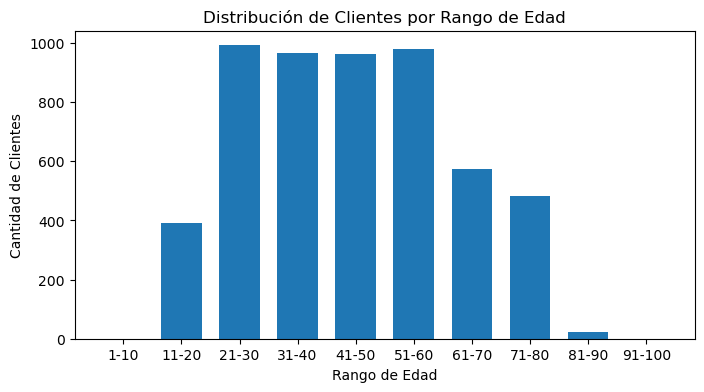

In [9]:
# Definimos los límites de los rangos de edad
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Etiquetas para los rangos de edad
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Creamos una nueva columna en el DataFrame que almacene el rango de edad
clients_df['age_range'] = pd.cut(clients_df['age'], bins=age_bins, labels=age_labels)

# Luego, puedemos contar la cantidad de clientes en cada rango de edad
age_range_counts = clients_df['age_range'].value_counts().sort_index()

# Por último creamos un gráfico de barras para visualizar el resultado
plt.figure(figsize=(8, 4))
plt.bar(age_range_counts.index, age_range_counts.values, width=0.7, align='center')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Clientes por Rango de Edad')
plt.show()

**RESPUESTA 1**

El rango etario con mayor cantidad de clientes es entre los 21 y los 60 años

---
**PREGUNTA 2: ¿Los distritos mas ricos toman mas deuda o menos deuda?**

Para contestar esto debemos analizar los montos de la columna "amount" en la tabla "loan_df" y compararlos con los distritos. Los distritos están en la tabla district_df por lo que vamos a tener que combinar ambas print(district_df.columns)

In [10]:
#Creamos dentro de loan_df la columna status_code y la columna status_describe
loan_df[['status_describe', 'status_code']] = 'A', 0 


#Modificamos el valor de status describe
loan_df.loc[loan_df['status'] == 'A', 'status_describe'] = 'Finalized ok'
loan_df.loc[loan_df['status'] == 'B', 'status_describe'] = 'Finalized in debt'
loan_df.loc[loan_df['status'] == 'C', 'status_describe'] = 'Running ok'
loan_df.loc[loan_df['status'] == 'D', 'status_describe'] = 'Running in debt'

#Modificamos el valor de status_code
loan_df.loc[loan_df['status'] == 'B', 'status_code'] = 1
loan_df.loc[loan_df['status'] == 'D', 'status_code'] = 1

loan_df.head(3)

,loan_id,account_id,date,amount,duration,payments,status,status_describe,status_code
0,5314,1787,1993-07-05,96396,12,8033.0,B,Finalized in debt,1
1,5316,1801,1993-07-11,165960,36,4610.0,A,Finalized ok,0
2,6863,9188,1993-07-28,127080,60,2118.0,A,Finalized ok,0


In [11]:
loan_district_df = loan_df.merge(
                                accounts_df,
                                how = 'left',
                                on = 'account_id'
                                )
loan_district_df = loan_district_df.merge(
                                        district_df,
                                        how = 'left',
                                        left_on = 'account_id',
                                        right_on = 'A1',
                                        validate = 'many_to_one'
                                        )
print(loan_district_df.columns)

Index(['loan_id', 'account_id', 'date_x', 'amount', 'duration', 'payments',
       'status', 'status_describe', 'status_code', 'district_id', 'frequency',
       'date_y', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')


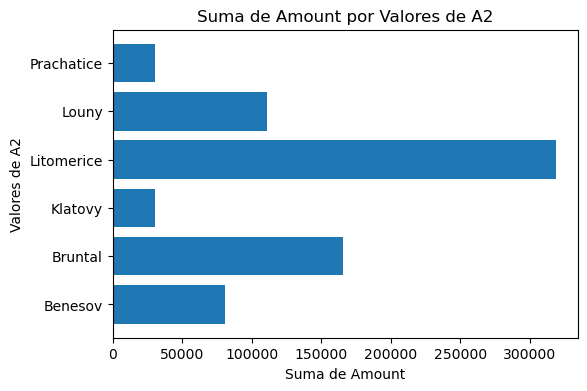

In [12]:
# Paso 1: Agrupar por 'A1' y sumar 'amount'
grouped = loan_district_df.groupby('A2')['amount'].sum().reset_index()

# Paso 2: Crear un gráfico de barras horizontales
plt.figure(figsize=(6, 4))
plt.barh(grouped['A2'], grouped['amount'])
plt.xlabel('Suma de Amount')
plt.ylabel('Valores de A2')
plt.title('Suma de Amount por Valores de A2')
plt.show()

In [13]:
def comparar_salarios_con_media(df):
    # Calculamos la media salarial
    media_salarial = df['A11'].mean()
    
    # Filtramos los distritos con rangos salariales superiores a la media
    distritos_superiores = df[df['A11'] > media_salarial]
    
    # Imprimir los distritos con salarios superiores a la media
    for index, row in distritos_superiores.iterrows():
        print(f"El distrito {row['A2']} tiene un rango salarial superior a la media: {row['A11']}")
    print(f"La media salarial es: {media_salarial}")
    
comparar_salarios_con_media(loan_district_df)

El distrito Louny tiene un rango salarial superior a la media: 8965.0
El distrito Litomerice tiene un rango salarial superior a la media: 9065.0
La media salarial es: 8600.5


---
**PREGUNTA 2: ¿Los distritos mas ricos toman mas deuda o menos deuda?**

**RESPUESTA:**
Solo hay dos distritos donde los ingresos tienen un salario mayor al promedio general, dichos distritos son Litomerice y Louny, siendo ambos 1er y 3er lugar entre los distritos que mas deuda en total suman 

---
**PREGUNTA 3: ¿Qué méses se endeudan más los clientes?**

In [14]:
# Creamos la columna month y le asignamos su valor de acuerdo a la columna date
loan_df['month'] = loan_df['date'].apply(lambda x: x.strftime('%B'))

# Agrupamos por mes
m_group = loan_df.groupby('month').count()

print(m_group['status_code'])

month
April        48
August       58
December     66
February     50
January      55
July         59
June         62
March        55
May          58
November     55
October      53
September    63
Name: status_code, dtype: int64


---
Ahora analicemos la sumatoria de los montos de acuerdo a cada mes

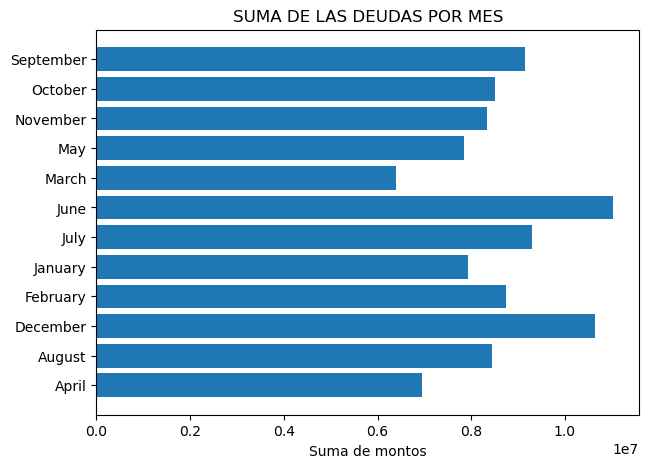

In [15]:
# Armamos la sumatoria de los montos por mes
am_group = loan_df.groupby('month')['amount'].sum().reset_index()

# Graficamos
plt.figure(figsize=(7, 5))
plt.barh(am_group['month'], am_group['amount'])
plt.xlabel('Suma de montos')
plt.title('SUMA DE LAS DEUDAS POR MES')
plt.show()

**PREGUNTA 3: ¿Qué méses se endeudan más los clientes?**

**RESPUESTA**
Se observa que en el mes de junio, septiembre y diciembre son los meses donde mas créditos se tomaron

---
**PREGUNTA 4: ¿Que porcentaje de clientes hay de acuerdo al género?¿Y qué genero es mas probable que termine en mora por no pagar su deuda?**

Para contestar esta pregunta es necesario que unamos los datasets clients, accounts y loan

In [16]:
# Creamos el dataframe con el que vamos a trabajar
male_female_df = accounts_df.merge(
                                    loan_df,
                                    how = 'left',
                                    on = 'account_id'
                                    )
male_female_df = male_female_df.merge(
                                        dispos_df,
                                        how = 'left',
                                        on = 'account_id'
                                        )
male_female_df = male_female_df.merge(
                                        clients_df,
                                        how = 'left',
                                        on = 'client_id'
                                        )
# Imprimimos los encabezados de las columnas para verificar las uniones
print(male_female_df.columns)

Index(['account_id', 'district_id_x', 'frequency', 'date_x', 'loan_id',
       'date_y', 'amount', 'duration', 'payments', 'status', 'status_describe',
       'status_code', 'month', 'disp_id', 'client_id', 'type', 'birth_number',
       'district_id_y', 'birth_date', 'gender', 'age', 'age_range'],
      dtype='object')


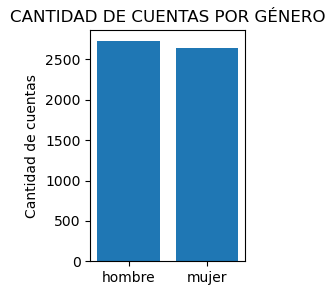

In [17]:
# Reemplazamos 0 por hombre y 1 por mujer
male_female_df['gender'].replace({ 0 : 'hombre', 1 : 'mujer' }, inplace = True)

# Separamos entre hombre y mujer la cantidad de cuentas
groupbysex = male_female_df.groupby('gender')['account_id'].count().reset_index()

# Graficamos
plt.figure(figsize=( 2 , 3 ))
plt.bar(groupbysex['gender'], groupbysex['account_id'])
plt.ylabel('Cantidad de cuentas')
plt.title('CANTIDAD DE CUENTAS POR GÉNERO')
plt.show()

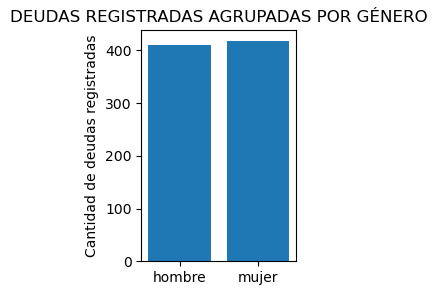

In [18]:
loanbysex = male_female_df.groupby('gender')['loan_id'].count().reset_index()

plt.figure( figsize = ( 2 , 3 ) )
plt.bar( loanbysex ['gender'] , loanbysex ['loan_id'] )
plt.ylabel ('Cantidad de deudas registradas')
plt.title ('DEUDAS REGISTRADAS AGRUPADAS POR GÉNERO')
plt.show()

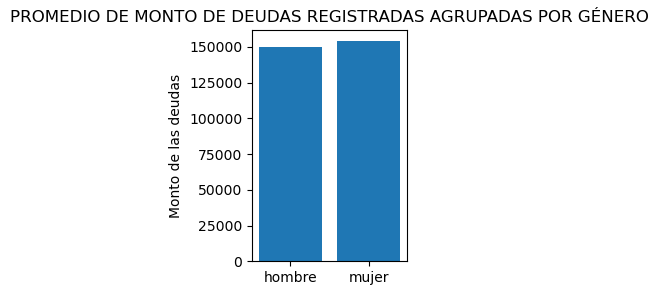

In [19]:
loanmeanbysex = male_female_df.groupby('gender')['amount'].mean().reset_index()

plt.figure( figsize = ( 2 , 3 ) )
plt.bar( loanmeanbysex ['gender'] , loanmeanbysex ['amount'] )
plt.ylabel ('Monto de las deudas')
plt.title ('PROMEDIO DE MONTO DE DEUDAS REGISTRADAS AGRUPADAS POR GÉNERO')
plt.show()

**PREGUNTA 4: ¿Que porcentaje de clientes hay de acuerdo al género?¿Y qué genero es mas probable que termine en mora por no pagar su deuda?**

**RESPUESTA:**
Se puede ver que no hay una diferencia significativa entre el total de la cantidad de cuentas entre hombres vs mujeres. Lo mismo pasa con la cantidad de deudas y con el promedio entre los montos de deudas.

---

**CLASIFICACIÓN BINARIA CON LOS DATOS**
--

En esta sección trabajaremos con el algoritmos de clasificación binaria de scikit-learn para poder pronósticar, mediante las propiedades de una cuenta, qué probabilidad tiene una deuda de pasar a ser impaga.

In [20]:

# Armamos un dataframe uniendo los demás dataframe
classif_df = loan_df.merge(
                            accounts_df,
                            how = 'left',
                            on = 'account_id',
                            validate = 'many_to_one'
                            )

classif_df = classif_df.merge(
                                district_df[['A1','A2','A3','A4','A11','A13','A16']],
                                how = 'left',
                                left_on = 'district_id',
                                right_on = 'A1'
                                )

classif_df = classif_df.merge(
                                dispos_df,
                                how = 'left',
                                on = 'account_id'
                                )

classif_df = classif_df.merge(
                                cards_df,
                                how = 'left',
                                on = 'disp_id'
                                )

classif_df = classif_df.merge(
                                clients_df,
                                how = 'left',
                                on = 'client_id',
                                validate = 'many_to_one'
                                )

print(classif_df.columns)


Index(['loan_id', 'account_id', 'date_x', 'amount', 'duration', 'payments',
       'status', 'status_describe', 'status_code', 'month', 'district_id_x',
       'frequency', 'date_y', 'A1', 'A2', 'A3', 'A4', 'A11', 'A13', 'A16',
       'disp_id', 'client_id', 'type_x', 'card_id', 'type_y', 'issued',
       'birth_number', 'district_id_y', 'birth_date', 'gender', 'age',
       'age_range'],
      dtype='object')


In [21]:
classif_df.shape

(827, 32)

In [22]:
#Revisamos si nuestro df final tiene valores en blanco
classif_df.isnull().sum()

loan_id              0
account_id           0
date_x               0
amount               0
duration             0
payments             0
status               0
status_describe      0
status_code          0
month                0
district_id_x        0
frequency            0
date_y               0
A1                   0
A2                   0
A3                   0
A4                   0
A11                  0
A13                  0
A16                  0
disp_id              0
client_id            0
type_x               0
card_id            657
type_y             657
issued             657
birth_number         0
district_id_y        0
birth_date           0
gender               0
age                  0
age_range            0
dtype: int64

Suponemos que los valores nulos en card son porque los clientes no poseen tarjeta de crédito, por lo que completamos con el método fillna reemplazando los valores nulos por "no credit card" en las columnas 'card_id', 'type_x' e 'issued'

In [23]:
classif_df['card_id'].fillna('no credit card', inplace = True)
classif_df['type_x'].fillna('no credit card', inplace = True)
classif_df['issued'].fillna('no credit card', inplace = True)

In [24]:
# Eliminamos las columnas innecesarias
columnas_a_eliminar = ['loan_id', 'account_id', 'date_x', 'payments', 'status', 'date_y', 'disp_id', 'client_id', 'card_id', 'type_y', 'issued']
classif_df.drop(
                columnas_a_eliminar,
                axis = 1, 
                inplace = True
               )

# Eliminamos los valores vaciós de los distritos
classif_df.dropna(subset = ['A1', 'A2', 'A3', 'A4', 'A11', 'A13', 'A16'], inplace = True)

classif_df.isnull().sum()

amount             0
duration           0
status_describe    0
status_code        0
month              0
district_id_x      0
frequency          0
A1                 0
A2                 0
A3                 0
A4                 0
A11                0
A13                0
A16                0
type_x             0
birth_number       0
district_id_y      0
birth_date         0
gender             0
age                0
age_range          0
dtype: int64

In [25]:
classif_df.describe()

,amount,duration,status_code,district_id_x,A1,A4,A11,A13,A16,birth_number,district_id_y,gender,age
count,827.000000,827.000000,827.000000,827.000000,827.000000,8.270000e+02,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,151801.538089,36.261185,0.091898,37.621524,37.621524,2.743573e+05,9499.998791,3.499528,16603.539299,582148.870617,38.215236,0.504232,40.103990
std,114577.041848,17.172800,0.289057,25.195087,25.195087,3.614659e+05,1333.959964,2.127614,31585.083216,129709.966792,25.033481,0.500285,12.961718
min,4980.000000,12.000000,0.000000,1.000000,1.000000,4.282100e+04,8110.000000,0.430000,888.000000,341130.000000,1.000000,0.000000,13.000000
25%,67536.000000,24.000000,0.000000,13.000000,13.000000,9.208400e+04,8544.000000,1.960000,2252.000000,470126.500000,14.000000,0.000000,29.500000
50%,115992.000000,36.000000,0.000000,39.000000,39.000000,1.246050e+05,8980.000000,3.490000,3839.000000,580821.000000,41.000000,1.000000,40.000000
75%,210564.000000,48.000000,0.000000,60.000000,60.000000,2.261220e+05,9897.000000,4.720000,6872.000000,688169.500000,60.000000,1.000000,51.000000
max,590820.000000,60.000000,1.000000,77.000000,77.000000,1.204953e+06,12541.000000,9.400000,99107.000000,851019.000000,77.000000,1.000000,64.000000


C:\Users\Francisco\AppData\Local\Temp\ipykernel_17344\2946419820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  classi_corr = classif_df.corr()


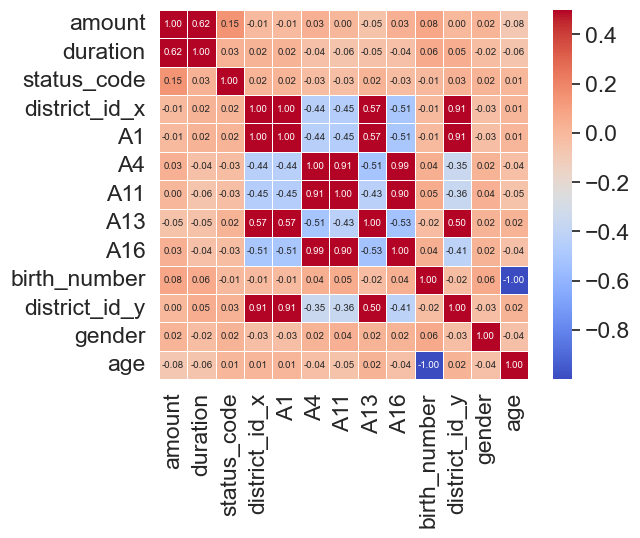

In [26]:
# Creamos la correlación
classi_corr = classif_df.corr()

# Crear heatmap
sns.set(font_scale=1.5)
sns.heatmap(
    classi_corr, xticklabels=classi_corr.columns, yticklabels=classi_corr.columns, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 7},
    linewidth=.5,
    vmax = 0.5
)
plt.show()

Ahora sabemos que las variables que mayor correlación tiene con el estado de la deuda son:
1. amount
3. A4 = N° de inhabitantes del distrito
4. A11 = Salario promedio del distrito
5. A16 = Ratio de crímenes cometidos en el distrito
6. age

Con esta información podremos armar nuestro algoritmo de clasificación.
Antes que nada lo que debemos hacer es identificar cual será nuestra variable dependiente que en este caso sería status_code (ya que lo que queremos es identificar qué rasgos representan a un deudor). Así que primeramente debemos ver que tan balanceados están los datos en status_code.

In [27]:
''' 
Contamos moroso y no morosos y calculamos el promedio
'''
morosos = classif_df['status_code'].sum()
no_morosos = classif_df['status_code'].count() - classif_df['status_code'].sum()
mean_morosos = morosos/classif_df['status_code'].count()
print(f'Los morosos son en total: {morosos}, y los no morosos son: {no_morosos}. El promedio de morosos es de: {mean_morosos}')


Los morosos son en total: 76, y los no morosos son: 751. El promedio de morosos es de: 0.09189842805320435


---

**CONCLUSIÓN**

De acuerdo a los datos obtenidos del análsis se concluyó que este dataset carece de datos suficientes para aplicar de forma óptima algoritmo de Regresion Logística (LOGIT) o algoritmo de Clasificación.